# Part 1. Exploratory Data Analysis

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # set seaborn default for plots
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [118]:
# fetch and see data
data = pd.read_csv('./input/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [119]:
# check null values in data
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin, Embarked have missing values and we need to fix them

In [355]:
# define pie plot
def plotPieChart(data, feature):
    categories = data[feature].value_counts()
    print(categories)
    categories.plot.pie(subplots=True)

In [420]:
# plot descriptive feature vs target feature
def plotFeatureToTarget(feature, target):
    survived = data[data[target]==1][feature].value_counts()
    dead = data[data[target]==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='pie', figsize=(10,5), subplots=True)
    df.plot(kind='bar', figsize=(10,5), stacked=False)

In [421]:
# define histogram plot
def plotHistogram(data, feature):
    sns.distplot(a=data.dropna()[feature], kde=False)

In [422]:
# define bar graph
def plotBarGraph(data, feature, stacked=True):
    survived = data[data['Survived']==1][feature].value_counts()
    dead = data[data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=stacked)

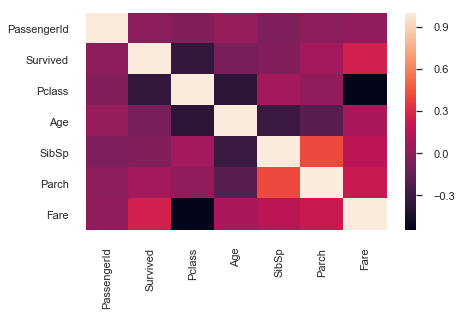

In [423]:
# visualizing correlation between attributes
corr = data.corr()
sns.heatmap(corr) # only appies to non categorical variables

### Types of Features

#### 1. Categorical Feature: Nominal 

categorical feature: a feature that has 1 or more categories and the categories are not sortable in a meaningful way (i.e. male > female ??)

#### 2. Categorical Feature: Ordinal

ordinal feature: categorical feature that has relative ordering for sorting. ex) height category: Tall > Medium > Short

#### 3. Continuous Feature

continuous feature can take values between any 2 points. ex) Fare

male      577
female    314
Name: Sex, dtype: int64


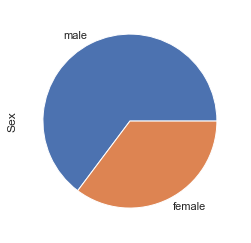

In [424]:
# Analyzing the features,

# first 'Sex' attribute // a Categorical Feature

plotPieChart(data, 'Sex')

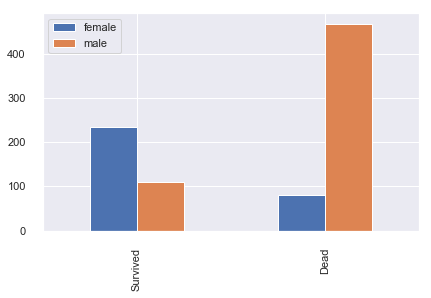

In [425]:
plotBarGraph(data, 'Sex', stacked=False)

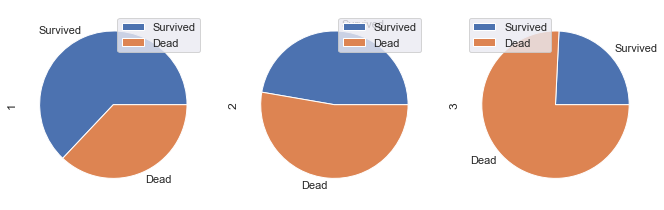

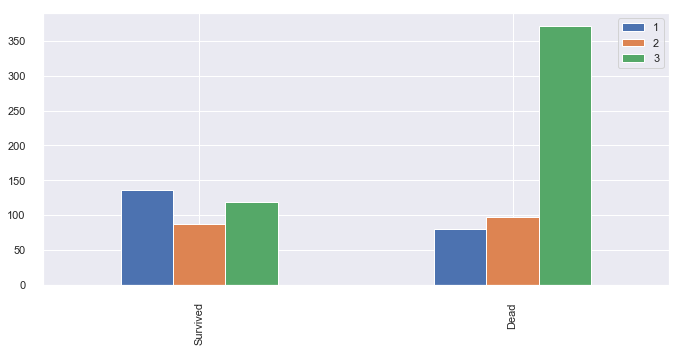

In [427]:
plotFeatureToTarget('Pclass', 'Survived')